<a href="https://colab.research.google.com/github/Chochoho/AIFFEL_quest_cr/blob/main/%EC%BC%80%EC%B0%BD%EB%94%A5/4%EB%8B%A8%EC%9B%90-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#뉴스 기사 분류 : 다중 분류 문제

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

In [34]:
len(train_data)

8982

In [35]:
len(test_data)

2246

In [36]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [51]:
word_index=reuters.get_word_index()
reverse_word_index=dict(([(value, key) for (key, value) in word_index.items()]))
decoded_newswire="".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])


In [52]:
train_labels[10]

3

In [56]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results
y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

In [58]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [59]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [60]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [61]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [62]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [63]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3791 - loss: 3.3115 - val_accuracy: 0.6390 - val_loss: 1.9364
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6726 - loss: 1.6997 - val_accuracy: 0.7080 - val_loss: 1.3910
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7457 - loss: 1.2265 - val_accuracy: 0.7400 - val_loss: 1.1847
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.7990 - loss: 0.9457 - val_accuracy: 0.7740 - val_loss: 1.0706
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8300 - loss: 0.7924 - val_accuracy: 0.7790 - val_loss: 1.0176
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8598 - loss: 0.6564 - val_accuracy: 0.7890 - val_loss: 0.9664
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8773 - loss: 0.5806 - val_accuracy: 0.8050 - val_loss: 0.9365
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8981 - loss: 0.4877 - val_accuracy: 0.8060 -

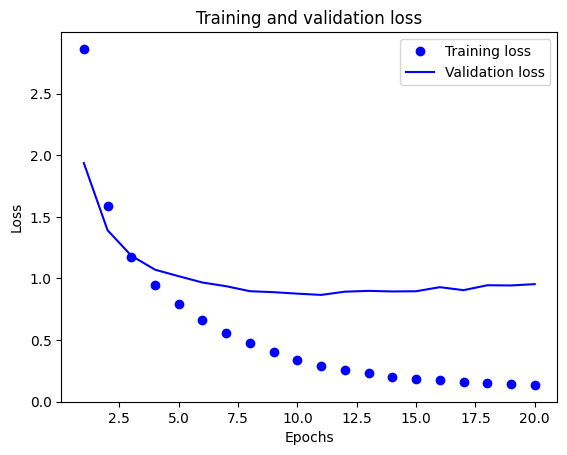

In [69]:
import matplotlib.pyplot as plt
history_dict=history.history

loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

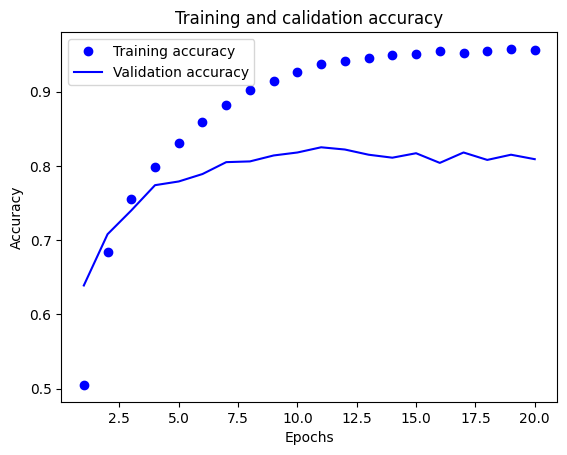

In [70]:
plt.clf()
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and calidation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])

In [73]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3105 - loss: 3.3120
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6416 - loss: 1.7756
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7185 - loss: 1.2977
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7858 - loss: 1.0331
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8144 - loss: 0.8756
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8543 - loss: 0.7004
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8758 - loss: 0.6069
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8897 - loss: 0.5253
Epoch 9/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9122 - loss: 0.4210
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.9248


In [74]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()


0.18432769367764915

In [75]:
predictions=model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


3

In [76]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [125]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])

In [126]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [127]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4269 - loss: 3.1137
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6889 - loss: 1.5170
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7566 - loss: 1.1247
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8099 - loss: 0.9009
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8374 - loss: 0.7734
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8683 - loss: 0.6270
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8890 - loss: 0.5204
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9109 - loss: 0.4283
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9252 - loss: 0.3648
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.8891


In [128]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()

0.18967052537845058

In [129]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [130]:
predictions[0].shape

(46,)

In [131]:
np.sum(predictions[0])

1.0000001

In [132]:
np.argmax(predictions[0])

3

In [133]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [134]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [137]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2384 - loss: 3.3913 - val_accuracy: 0.3840 - val_loss: 2.3961
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4146 - loss: 2.2060 - val_accuracy: 0.4420 - val_loss: 1.9133
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4800 - loss: 1.7243 - val_accuracy: 0.5580 - val_loss: 1.5508
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6776 - loss: 1.3460 - val_accuracy: 0.6790 - val_loss: 1.3584
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7271 - loss: 1.1087 - val_accuracy: 0.6860 - val_loss: 1.3023
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7444 - loss: 1.0205 - val_accuracy: 0.6970 - val_loss: 1.2791
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7529 - loss: 0.9136 - val_accuracy: 0.7020 - val_loss: 1.2759
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7638 - loss: 0.8516 - val_accuracy: 0.6980 - v